In [1]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import utilities

sns.set()

train_values = pd.read_csv('./data/train_values.csv') 
train_labels = pd.read_csv('./data/train_labels.csv') 

train_df = train_values.merge(train_labels, on='row_id', how='inner')

# drop row_id
train_df = train_df.drop(columns=['row_id'])
train_df.head(5)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [2]:
train_df.dtypes


loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [3]:
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 22 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [4]:
# start off simple - drop the NAs
#df = train_df.dropna() 
df = train_df 
# set the co_applicant to int for histograms
df['co_applicant'] = df['co_applicant'].astype(int)


# get more sophisitcated later
utilities.remove_cols_with_perc_missing_values(train_df, .1)
print('done!')

columns with less than  0.1  non-null values: 
done!


In [5]:
# make some additional categorical columns for some quick Eexploratory data analysis

# loan_type
loan_type_dict = {'1':'Conventional', '2':'FHA-Insured', '3':'VA-guarenteed', '4':'FSA/RHS'}
utilities.factor_int_column_with_keys(df, 'loan_type', loan_type_dict)

# property type
property_type_dict = {'1':'1 to 4 Family - non manufactured', 
                      '2':'Manufactured Housing',
                      '3':'Multifamily'}
utilities.factor_int_column_with_keys(df, 'property_type', property_type_dict)

# loan purpose
loan_purpose_dict = {'1':'Home purchase',
                      '2':'Home improvement',
                      '3':'Refinancing'}
utilities.factor_int_column_with_keys(df, 'loan_purpose', loan_purpose_dict)

# occupancy
occupancy_dict = {'1':'Owner Occupied',
                  '2':'Not owner-occupied',
                  '3': None}
utilities.factor_int_column_with_keys(df, 'occupancy', occupancy_dict)

# preapproval
preapproval_dict = {'1':'Requested',
                    '2':'Not Requested',
                    '3':None}
utilities.factor_int_column_with_keys(df, 'preapproval', preapproval_dict)

# applicant_ethnicity 
app_ethnicity_dict = {'1':'Hispanic',
                  '2':'Not Hispanic',
                  '3':None,
                  '4':None,
                  '5':None}
utilities.factor_int_column_with_keys(df, 'applicant_ethnicity', app_ethnicity_dict)

# applicant_race 
app_race_dict = {'1':'American Indian',
                '2':'Asian',
                 '3':'African American',
                 '4':'Pacific Islander',
                 '5':'White',
                 '6':None,
                 '7':None,
                 '8':None}
utilities.factor_int_column_with_keys(df, 'applicant_race', app_race_dict)

# applicant_sex 
app_gender_dict = {'1':'Male',
                   '2':'Female',
                   '3':None,
                   '4':None}
utilities.factor_int_column_with_keys(df, 'applicant_sex', app_gender_dict)

# look for -1 and replace with None appropriately
# msa_md, 
msa_md_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'msa_md', msa_md_dict)

#state_code, 
state_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'state_code', state_code_dict)

#country_code
county_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'county_code', county_code_dict)


df.head(5)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str
0,3,1,1,1,70.0,3,18,37,246,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246
1,1,1,3,1,178.0,3,369,52,299,1,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299
2,2,1,3,1,163.0,3,16,10,306,2,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306
3,1,1,1,1,155.0,1,305,47,180,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180
4,1,1,1,1,305.0,3,24,37,20,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20


In [6]:
# subset categoricals for easy visualization
categorical_cols = [ 'loan_type_str', 'property_type_str', 'loan_purpose_str', 'occupancy_str', 'preapproval_str', 'applicant_ethnicity_str',
                     'applicant_race_str', 'applicant_sex_str', 'msa_md_str', 'state_code_str', 'county_code_str' ]
categorical_df = df[ categorical_cols ]
categorical_df['accepted'] = df['accepted']

categorical_df.head(5)


C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,loan_type_str,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str,accepted
0,VA-guarenteed,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246,1
1,Conventional,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299,0
2,FHA-Insured,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306,1
3,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180,1
4,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20,1


In [7]:
# df , label_key, max_fields=10
# see if there's any significant difference ( +- 5% of 50% ) per category

        
'''
for col in df.columns:
    df = pd.crosstab( df[col], df[label_key], normalize='index')
    #if (len(df) < max_fields):
    print(df)
    print('--------------------')
'''
                  
# see if there's any significant difference ( +- 5% of 50% ) per category

#print('--------------------')
            
utilities.category_compare_to_classification_label(categorical_df, 'accepted', 10)

accepted              0         1
loan_type_str                    
Conventional   0.504052  0.495948
FHA-Insured    0.494868  0.505132
FSA/RHS        0.438937  0.561063
VA-guarenteed  0.480959  0.519041
------
accepted                                 0         1
property_type_str                                   
1 to 4 Family - non manufactured  0.489234  0.510766
Manufactured Housing              0.774125  0.225875
Multifamily                       0.315377  0.684623
------
accepted                 0         1
loan_purpose_str                    
Home improvement  0.670821  0.329179
Home purchase     0.405581  0.594419
Refinancing       0.547117  0.452883
------
accepted                   0         1
occupancy_str                         
Not owner-occupied  0.476942  0.523058
Owner Occupied      0.503067  0.496933
------
accepted                0         1
preapproval_str                    
Not Requested    0.343797  0.656203
Requested        0.703562  0.296438
------
accepted   

In [8]:
pd.crosstab(df['loan_type_str'],df['accepted'], normalize='index')

accepted,0,1
loan_type_str,,
Conventional,0.504052,0.495948
FHA-Insured,0.494868,0.505132
FSA/RHS,0.438937,0.561063
VA-guarenteed,0.480959,0.519041


In [9]:
pd.crosstab(df['property_type_str'],df['accepted'], normalize='index')

accepted,0,1
property_type_str,,
1 to 4 Family - non manufactured,0.489234,0.510766
Manufactured Housing,0.774125,0.225875
Multifamily,0.315377,0.684623


In [10]:
pd.crosstab(df['loan_purpose_str'],df['accepted'], normalize='index')

accepted,0,1
loan_purpose_str,,
Home improvement,0.670821,0.329179
Home purchase,0.405581,0.594419
Refinancing,0.547117,0.452883


In [11]:
pd.crosstab(df['preapproval_str'],df['accepted'], normalize='index')

accepted,0,1
preapproval_str,,
Not Requested,0.343797,0.656203
Requested,0.703562,0.296438


In [12]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.674602,0.325398
American Indian,0.664127,0.335873
Asian,0.463193,0.536807
Pacific Islander,0.579735,0.420265
White,0.468084,0.531916


In [13]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.674602,0.325398
American Indian,0.664127,0.335873
Asian,0.463193,0.536807
Pacific Islander,0.579735,0.420265
White,0.468084,0.531916


In [14]:
pd.crosstab(df['applicant_sex_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_sex_str,,
Female,0.533547,0.466453
Male,0.479177,0.520823


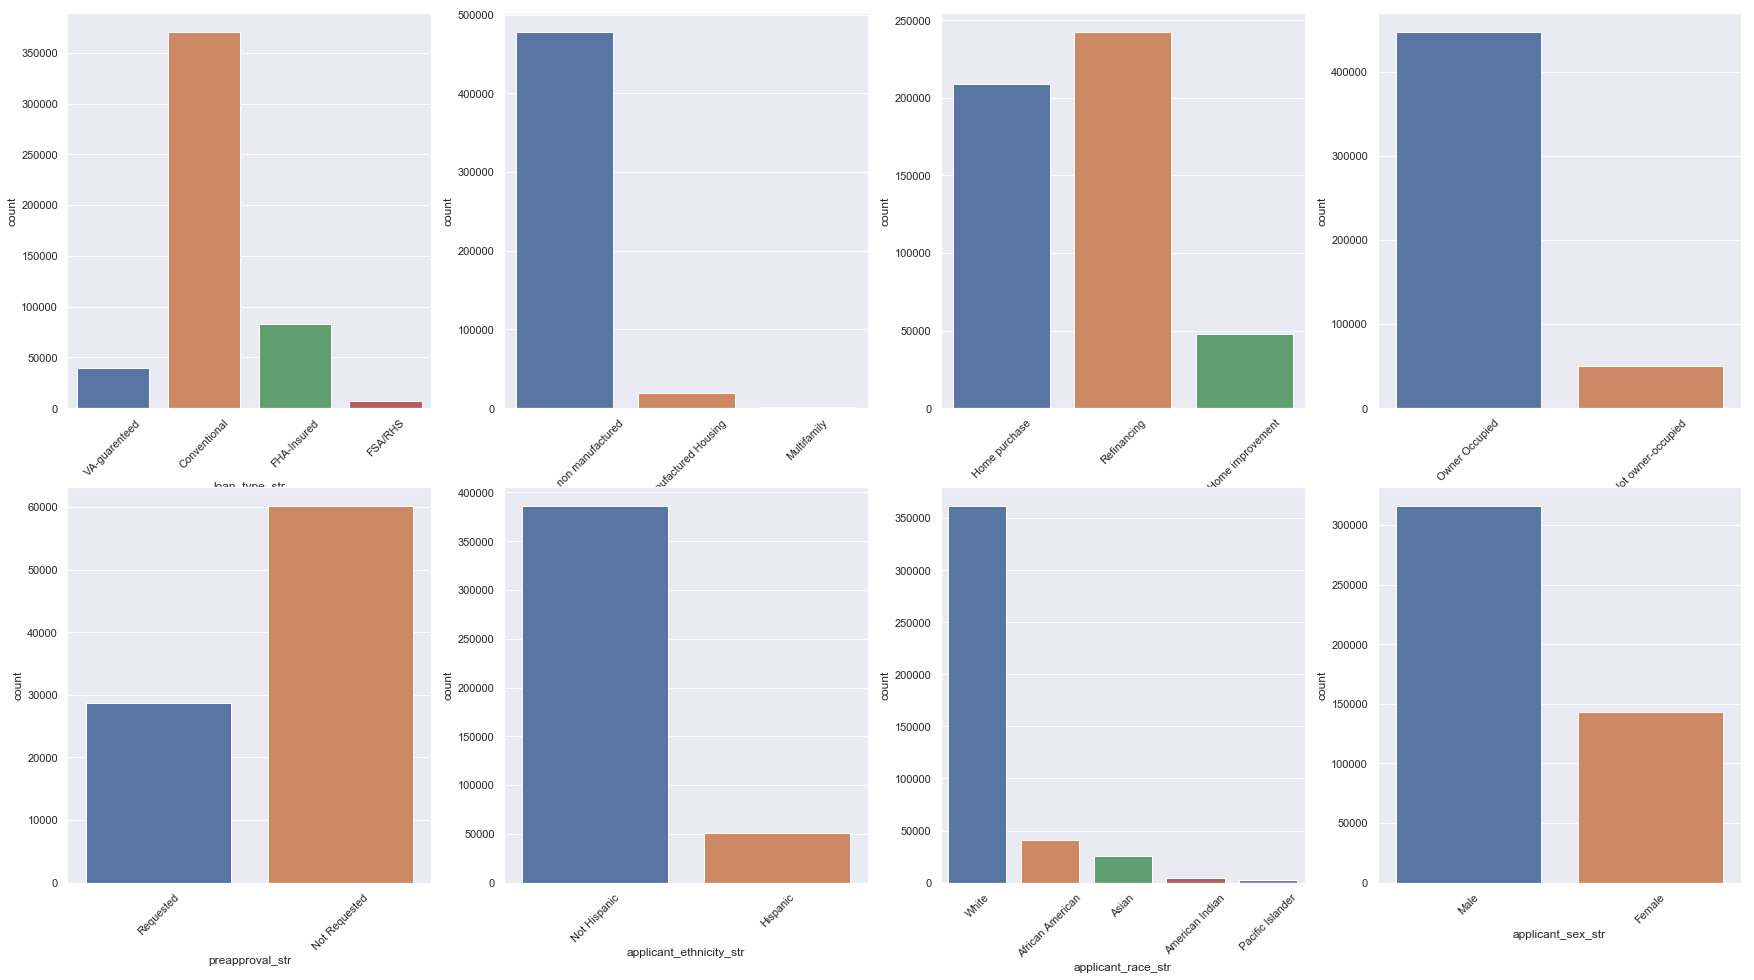

In [15]:


# set default style
sns.set()

# plot distribution in grid
fig, ax = plt.subplots(2, 4, figsize=(30, 16))
for variable, subplot in zip(categorical_df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [16]:
# normalize! Columns to consider
numeric_cols =[ 'loan_amount', 'applicant_income', 'population', 'ffiecmedian_family_income',
               'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']


# convert tp percentages
df['minority_population_pct'] = df['minority_population_pct']/100.0
df['tract_to_msa_md_income_pct'] = df['tract_to_msa_md_income_pct']/100.0

numeric_df = df[numeric_cols]
numeric_df['label'] = pd.Series( df['accepted'] )
numeric_df.head(5)

C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,loan_amount,applicant_income,population,ffiecmedian_family_income,number_of_owner-occupied_units,number_of_1_to_4_family_units,label
0,70.0,24.0,6203.0,60588.0,716.0,2642.0,1
1,178.0,57.0,5774.0,54821.0,1622.0,2108.0,0
2,163.0,67.0,6094.0,67719.0,760.0,1048.0,1
3,155.0,105.0,6667.0,78439.0,2025.0,2299.0,1
4,305.0,71.0,6732.0,63075.0,1464.0,1847.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159B6161C18>,
      dtype=object)

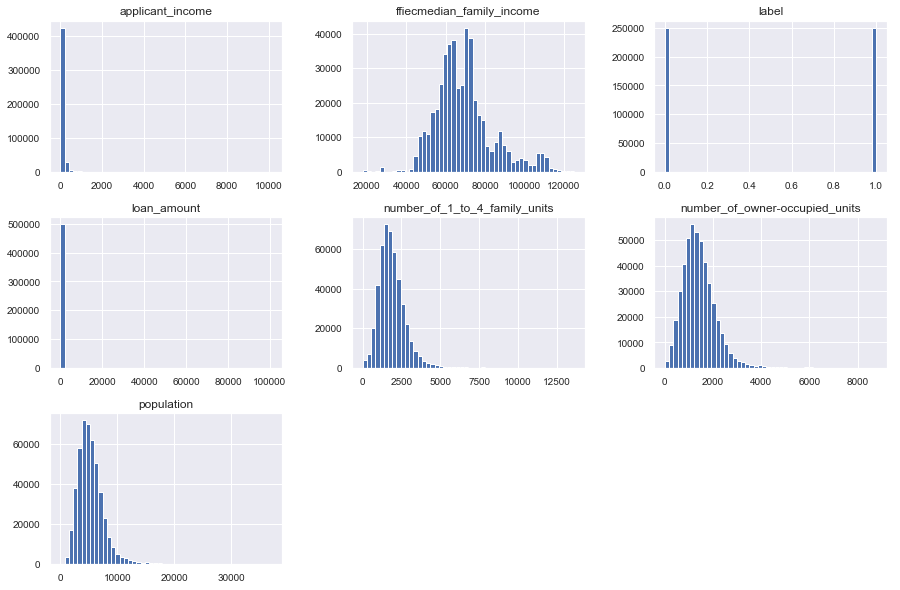

In [17]:
# look at the distributions
num_bins = 50 #int(math.sqrt(len(df)))
numeric_df.hist(figsize=(15,10), bins=num_bins, xlabelsize=10, ylabelsize=10)

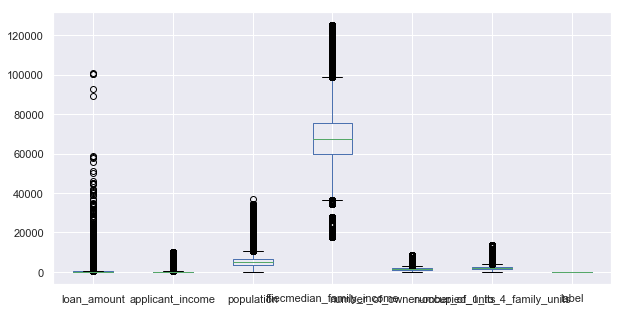

In [18]:
# look at the distributions
numeric_df.boxplot(figsize=(10,5)) # xlabelsize=10, ylabelsize=10)

In [19]:
# export post transform copy
df.to_csv('./data/post_transform.csv', index=False)

,loan_amount,applicant_income,population,ffiecmedian_family_income,number_of_owner-occupied_units,number_of_1_to_4_family_units
0,-0.531792,-0.714286,0.450973,-0.444174,-0.730861,0.881944
1,0.092486,-0.242857,0.293426,-0.813380,0.352871,0.352183
2,0.005780,-0.100000,0.410944,0.012356,-0.678230,-0.699405
3,-0.040462,0.442857,0.621373,0.698656,0.834928,0.541667
4,0.826590,-0.042857,0.645244,-0.284955,0.163876,0.093254
